In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
consump_dist=pd.read_excel('./가구특성별_소비지출구간별_가구분포.xlsx')

In [4]:
interval=consump_dist['소비지출(전년도)구간별']

for i in range(len(interval)):
    if interval[i]=='500만원 미만':
        interval[i]=500
    elif interval[i]=='500~1,000만원 미만':
        interval[i]=750
    elif interval[i]=='1,000~1,500만원 미만':
        interval[i]=1250
    elif interval[i]=='1,500~2,000만원 미만':
        interval[i]=1750
    elif interval[i]=='2,000~3,000만원 미만':
        interval[i]=2500
    elif interval[i]=='3,000~5,000만원 미만':
        interval[i]=4000
    elif interval[i]=='5,000만원 이상':
        interval[i]=5000

consump_dist['소비지출(전년도)구간별']=interval.astype('int64')

In [5]:
consump_dist['2022년']=consump_dist['2022년'].replace('-',0)
consump_dist['2023년']=consump_dist['2023년'].replace('-',0)

In [6]:
consump_dist['2022년 기대값']=consump_dist['소비지출(전년도)구간별']*consump_dist['2022년']
consump_dist['2023년 기대값']=consump_dist['소비지출(전년도)구간별']*consump_dist['2023년']

In [7]:
print(consump_dist['가구특성별'].value_counts())

가구특성별
전체                         7
(소득) 4분위                   7
(가구원수) 4인                  7
(가구원수) 5인 이상               7
(취업자수) 0인                  7
(취업자수) 1인                  7
(취업자수) 2인                  7
(취업자수) 3인 이상               7
(소득) 1분위                   7
(소득) 2분위                   7
(소득) 3분위                   7
(소득) 5분위                   7
(가구주 성) 남자                 7
(순자산) 1분위                  7
(순자산) 2분위                  7
(순자산) 3분위                  7
(순자산) 4분위                  7
(순자산) 5분위                  7
(가구유형) 한부모가구               7
(가구유형) 노인가구                7
(가구유형) 다문화가구               7
(가구유형) 장애인가구_조사            7
(가구원수) 3인                  7
(가구원수) 2인                  7
(가구원수) 1인                  7
(가구주 종사상지위) 기타(무직·학생 등)    7
(가구주 성) 여자                 7
(가구주 연령) 39세 이하            7
(가구주 연령) 29세 이하            7
(가구주 연령) 30-39세            7
(가구주 연령) 40-49세            7
(가구주 연령) 50-59세            7
(가구주 연령) 60세 이상            7
(가구주 연령) 65세 이상            7
(가구주 혼인상

In [8]:
cd=consump_dist.set_index(['가구특성별','소비지출(전년도)구간별'])
cd.describe() 
#하위층은 소비 감소, 윗부분은 크게 증가: 중간값 감소함, 위층 두터워짐
#23년에 소비 증가: 상위
# #2022년 기대값 23937.50 2023년 기대값 23475.00

,2022년,2023년,2022년 기대값,2023년 기대값
count,322.000000,322.000000,322.000000,322.000000
mean,14.284161,14.285714,36927.173913,38246.583851
std,11.793090,11.839342,44027.505907,45779.752255
min,0.000000,0.000000,0.000000,0.000000
25%,3.725000,3.700000,4931.250000,4050.000000
50%,12.200000,12.650000,23937.500000,23475.000000
75%,21.600000,21.675000,49900.000000,53437.500000
max,52.400000,50.500000,209600.000000,232000.000000


Text(0.5, 1.0, '2022년 소비 분포도')

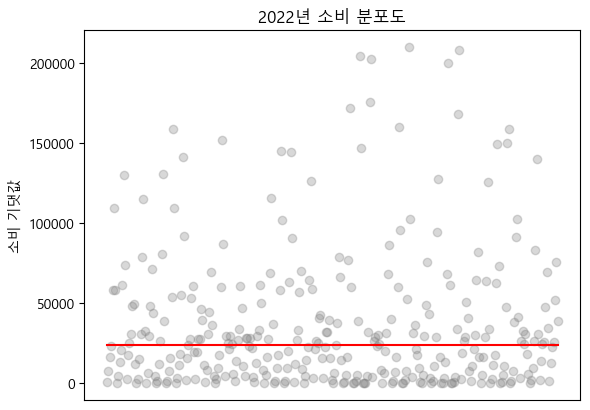

In [9]:
x=np.arange(len(consump_dist))
median_line=[23937.5]*322
plt.scatter(x,consump_dist['2022년 기대값'],c='grey',alpha=0.3)
plt.plot(x,median_line,c='r') #중위값

plt.ylabel('소비 기댓값')
plt.gca().axes.xaxis.set_visible(False)
plt.title('2022년 소비 분포도')

Text(0.5, 1.0, '2023년 소비 분포도')

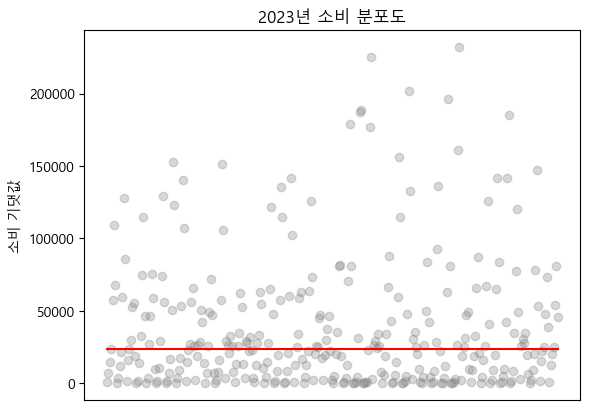

In [10]:
x=np.arange(len(consump_dist))
median_line=[23475.0]*322
plt.scatter(x,consump_dist['2023년 기대값'],c='grey',alpha=0.3)
plt.plot(x,median_line,c='r') #중위값

plt.ylabel('소비 기댓값')
plt.gca().axes.xaxis.set_visible(False)
plt.title('2023년 소비 분포도')

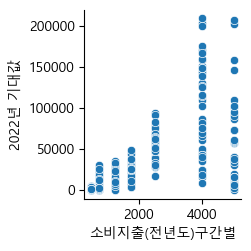

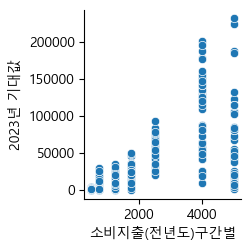

In [11]:
sns.pairplot(consump_dist,
             x_vars=['소비지출(전년도)구간별'],
             y_vars=['2022년 기대값'])

sns.pairplot(consump_dist,
             x_vars=['소비지출(전년도)구간별'],
             y_vars=['2023년 기대값'])

In [12]:
yr22_1=consump_dist.sort_values(by=['소비지출(전년도)구간별','2022년'],ascending=False)
yr22_1=yr22_1[yr22_1['2022년 기대값']>100000]
#실제 고소비 비율 가장 많은 집단은 중장년 남성

yr22_2=consump_dist.sort_values(by=['2022년 기대값','2022년'],ascending=False)
yr22_2=yr22_2[yr22_2['2022년 기대값']>100000]

yr23_1=consump_dist.sort_values(by=['소비지출(전년도)구간별','2023년'],ascending=False)
yr23_1=yr23_1[yr23_1['2023년 기대값']>100000]
#실제 고소비 비율 가장 많은 집단은 중장년 남성

yr23_2=consump_dist.sort_values(by=['2023년 기대값','2023년'],ascending=False)
yr23_2=yr23_2[yr23_2['2023년 기대값']>100000] 

In [13]:
yr22_1_list=list(yr22_1.index) #22' 소비구간 분포
yr22_2_list=list(yr22_2.index) #22' 소비금액 분포
yr23_1_list=list(yr23_1.index)
yr23_2_list=list(yr23_2.index)

In [25]:
yr22=list(zip(yr22_1_list,yr22_2_list))
yr23=list(zip(yr23_1_list,yr23_2_list))

# consump_df=pd.DataFrame(yr22_2_list+yr23_2_list)
# class_df=pd.DataFrame(yr22_1_list+yr23_1_list)

[(251, 215),
 (188, 251),
 (286, 180),
 (181, 188),
 (48, 243),
 (216, 187),
 (125, 173),
 (215, 250),
 (180, 208),
 (243, 47),
 (187, 286),
 (173, 82),
 (250, 285),
 (208, 278),
 (47, 181),
 (82, 124),
 (285, 131),
 (278, 54),
 (124, 306),
 (131, 40),
 (54, 12),
 (306, 236),
 (40, 145),
 (12, 271),
 (236, 117),
 (145, 26),
 (271, 5),
 (117, 48),
 (26, 216),
 (5, 292),
 (292, 125)]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

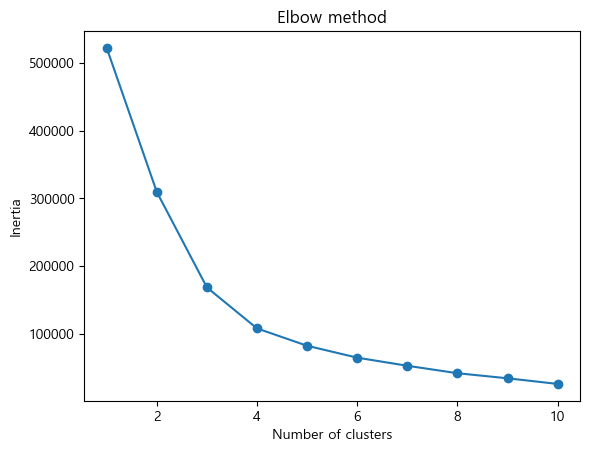

In [15]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(yr22)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


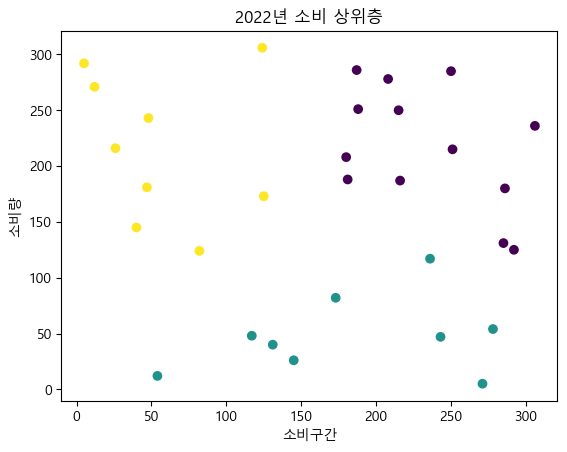

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(yr22)

x22=np.arange(len(yr22))
plt.scatter(yr22_1_list,yr22_2_list, c=kmeans.labels_)

plt.xlabel('소비구간')
plt.ylabel('소비량')

plt.title('2022년 소비 상위층')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

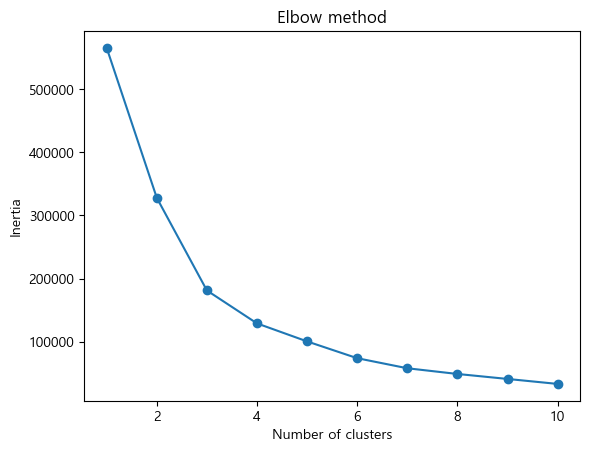

In [31]:
inertias2 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(yr23)
    inertias2.append(kmeans.inertia_)

plt.plot(range(1,11), inertias2, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


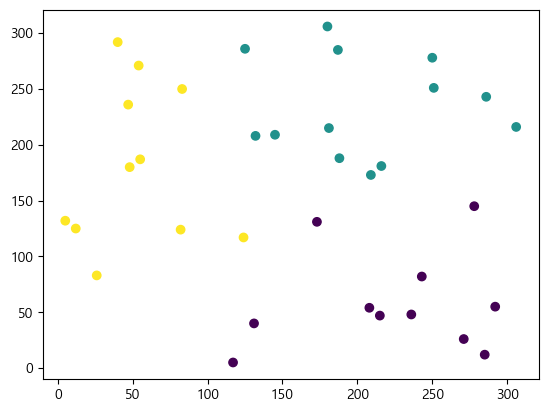

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(yr23)

plt.scatter(yr23_1_list,yr23_2_list, c=kmeans.labels_)

plt.show()